## Importing Necessary Library

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

## Data Fetching

#### CALL KAGGLE API (1ST WAY)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'username'
os.environ['KAGGLE_KEY'] = 'key'

!pip install kaggle

In [ ]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other


#### CALL KAGGLE API (2ND WAY)

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = 'username'
os.environ['KAGGLE_KEY'] = 'key'

!pip install kaggle

In [ ]:
import json

In [ ]:
kaggle_credentails = json.load(open("/content/kaggle.json"))

In [ ]:
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other


## Unzipping

In [ ]:
from zipfile import ZipFile

In [ ]:
# Unzip the downloaded dataset
with ZipFile("140k-real-and-fake-faces.zip", 'r') as zip_ref:
    zip_ref.extractall()

### Data retriving

In [ ]:
# Dataset Path
base_dir = "/content/real_vs_fake/real-vs-fake/train"
val_dir = "/content/real_vs_fake/real-vs-fake/valid"

(256, 256)


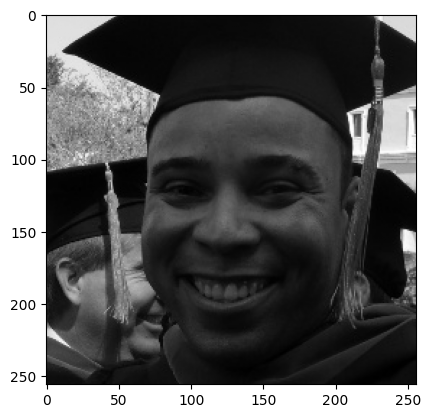

In [ ]:
image_path = "/content/real_vs_fake/real-vs-fake/train/real/00046.jpg"

image = cv2.imread(image_path)

# convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# display the grayscale image
print(gray_image.shape)
plt.imshow(gray_image, cmap='gray')
plt.show()

In [ ]:
print(gray_image)

[[221 222 222 ... 217 217 217]
 [223 223 223 ... 217 217 217]
 [223 223 223 ... 217 217 217]
 ...
 [ 10  11  13 ...  12  12  12]
 [ 10  12  14 ...  12  11  11]
 [ 13  14  15 ...  13  13  12]]


In [ ]:
img_size = 128
batch_size = 32

## Feature extraction and train, validation

In [ ]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
# def preprocess_gray(image):
#     # Convert grayscale (1 channel) to RGB (3 channels)
#     image = tf.convert_to_tensor(image) # Convert numpy array to Tensor
#     image = tf.image.grayscale_to_rgb(image)
#     return image

In [ ]:
# data_gen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.25,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     preprocessing_function=preprocess_gray
# )

In [ ]:
train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',
    subset='training',
)

Found 80000 images belonging to 2 classes.


In [ ]:
print(train_gen.class_indices)
print(train_gen.classes)
print(train_gen.image_shape)
print(len(train_gen))

{'fake': 0, 'real': 1}
[0 0 0 ... 1 1 1]
(128, 128, 1)
2500


In [ ]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    color_mode='grayscale',
)


Found 20000 images belonging to 2 classes.


In [ ]:
print(validation_generator.class_indices)
print(validation_generator.classes)
print(validation_generator.image_shape)
print(len(validation_generator))

{'fake': 0, 'real': 1}
[0 0 0 ... 1 1 1]
(128, 128, 1)
625


## CNN Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(38,kernel_size = (3,3),padding='same',activation='relu',input_shape=(img_size,img_size,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(layers.Conv2D(64,kernel_size = (3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(layers.Conv2D(128,kernel_size = (3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding = 'valid'))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 38)        │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 38)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          21,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,518,077 (32.49 MB)

 Trainable params: 8,518,077 (32.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'binary_crossentropy'
metrics = ['accuracy']

**steps_per_epoch = Total training images / Batch size**

**validation_steps = Total validation  images / Batch size**

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=len(train_gen),
    validation_steps=len(validation_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 173s 66ms/step - accuracy: 0.6383 - loss: 0.6244 - val_accuracy: 0.7901 - val_loss: 0.4517
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 191s 64ms/step - accuracy: 0.8097 - loss: 0.4190 - val_accuracy: 0.8401 - val_loss: 0.3583
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 128s 51ms/step - accuracy: 0.8601 - loss: 0.3298 - val_accuracy: 0.8667 - val_loss: 0.3079
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 129s 52ms/step - accuracy: 0.8878 - loss: 0.2726 - val_accuracy: 0.8816 - val_loss: 0.2854
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 138s 50ms/step - accuracy: 0.9062 - loss: 0.2331 - val_accuracy: 0.8883 - val_loss: 0.2617
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 142s 50ms/step - accuracy: 0.9143 - loss: 0.2126 - val_accuracy: 0.9053 - val_loss: 0.2369
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 125s 50ms/step - accuracy: 0.9238 - loss: 0.1885 - val_accuracy: 0.9064 - val_loss: 0.2304
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 126s 50ms/step - accuracy: 

## Model Evaluation

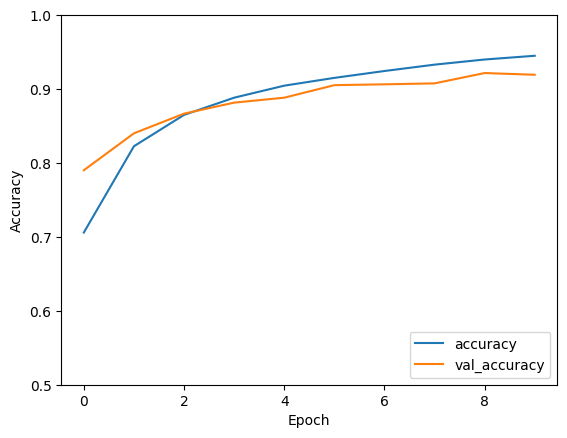

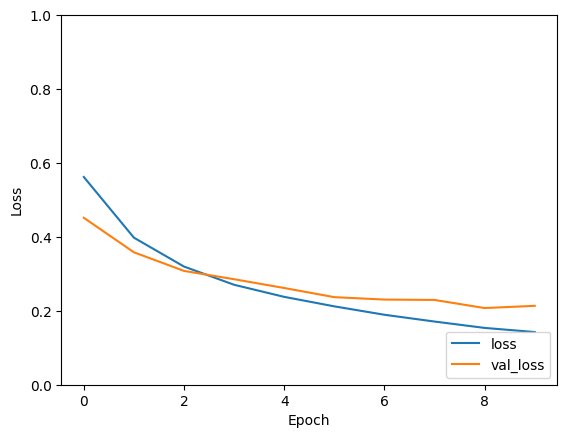

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# model evaluation
print("Evaluating model...")
loss, acc = model.evaluate(train_gen)
print("Train")
print(f"Accuracy: {acc * 100:.2f}%")
print(f"Loss: {loss}")
val_los, val_acc = model.evaluate(validation_generator)
print("Validation")
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_los}")

Evaluating model...
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 96s 39ms/step - accuracy: 0.9770 - loss: 0.0762
Train
Accuracy: 97.67%
Loss: 0.07568032294511795
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9182 - loss: 0.2199
Validation
Validation Accuracy: 91.93%
Validation Loss: 0.21341894567012787


## Saving file

In [ ]:
model.save('Real_fake_prediction_model.h5')

## Testing the model

### Manual testing

In [3]:
import tensorflow as tf
import numpy as np
import cv2

# Load the trained model
model = tf.keras.models.load_model("Real_fake_prediction_model_1.h5")

# Function to preprocess and predict an image
def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image as grayscale
    img = cv2.resize(img, (128, 128))  # Resize to match the training input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = np.expand_dims(img, axis=-1) # Add channel dimension for grayscale

    prediction = model.predict(img)  # Predict
    class_label = "Real" if prediction[0][0] > 0.5 else "Fake"  # Assuming binary classification

    print(f"Prediction: {class_label}")

In [5]:
predict_image(r"C:\Users\bdala\Desktop\DL_Project\CNN\Real_Fake_Face_Detection\test img\00MZYXAT77.jpg") # Fake

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Prediction: Fake


In [6]:
predict_image(r"C:\Users\bdala\Desktop\DL_Project\CNN\Real_Fake_Face_Detection\test img\00141-real.jpg") # real

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Prediction: Real


### Checking/Comapre with test.csv to check the accuracy

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd

# Load the trained model
model = tf.keras.models.load_model("/content/Real_fake_prediction_model_1.h5")

# Define dataset directory
test_data_dir = "/content/real_vs_fake/real-vs-fake/test"  # Replace with the actual path

# Get all image paths
real_images = [os.path.join(test_data_dir, "real", img) for img in os.listdir(os.path.join(test_data_dir, "real"))]
fake_images = [os.path.join(test_data_dir, "fake", img) for img in os.listdir(os.path.join(test_data_dir, "fake"))]

all_images = real_images + fake_images  # Combine both categories

# Function to preprocess images
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image as grayscale
    img = cv2.resize(img, (128, 128))  # Resize (ensure it matches model input size)
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = np.expand_dims(img, axis=-1)  # Add channel dimension for grayscale
    return img

# Predict and store results
predictions = []
for img_path in all_images:
    img_name = os.path.basename(img_path)  # Get image name
    img = preprocess_image(img_path)  # Preprocess image
    pred = model.predict(img)[0][0]  # Predict
    label = 1 if pred > 0.5 else 0  # Convert to binary (1 = Real, 0 = Fake)
    predictions.append([img_name, label])

# Save predictions to CSV
df = pd.DataFrame(predictions, columns=["image_name", "prediction"])
df.to_csv("predictions.csv", index=False)

print("Predictions saved to predictions.csv")

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step